## Import Library and Loading data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from itertools import cycle

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
#local update
C_10 = np.loadtxt('../output/auto_correlations/local_update/Correlation_L10.dat',)
C_20 = np.loadtxt('../output/auto_correlations/local_update/Correlation_L20.dat', )
C_40 = np.loadtxt('../output/auto_correlations/local_update/Correlation_L40.dat', )
C_60 = np.loadtxt('../output/auto_correlations/local_update/Correlation_L60.dat', )
C_80 = np.loadtxt('../output/auto_correlations/local_update/Correlation_L80.dat', )

In [3]:
# Naive wolff
C_10_wolff = np.loadtxt('../output/auto_correlations/naive_wolff/Correlation_L10.dat')
C_20_wolff = np.loadtxt('../output/auto_correlations/naive_wolff/Correlation_L20.dat')
C_40_wolff = np.loadtxt('../output/auto_correlations/naive_wolff/Correlation_L40.dat')
C_60_wolff = np.loadtxt('../output/auto_correlations/naive_wolff/Correlation_L60.dat')
C_80_wolff = np.loadtxt('../output/auto_correlations/naive_wolff/Correlation_L80.dat')

In [4]:
# self-learning update
C_10_slmc = np.loadtxt('../output/auto_correlations/slmc/Correlation_L10.dat')
C_20_slmc = np.loadtxt('../output/auto_correlations/slmc/Correlation_L20.dat')
C_40_slmc = np.loadtxt('../output/auto_correlations/slmc/Correlation_L40.dat')
C_60_slmc = np.loadtxt('../output/auto_correlations/slmc/Correlation_L60.dat')
C_80_slmc = np.loadtxt('../output/auto_correlations/slmc/Correlation_L80.dat')

In [5]:
from scipy.optimize import curve_fit

def func(x, a):
    return -(1/a)*x

def get_autcorrelation_time(C, init, sample:int, ):
    x_data= np.arange(init, sample)
    y_data = np.log(C[init :sample]/C[0])
    popt, pcov = curve_fit(func, x_data, y_data)
    popt = popt.round(2)
    return popt

## システムサイズL=40 (T=2.49)での比較

/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_12664/1203240017.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


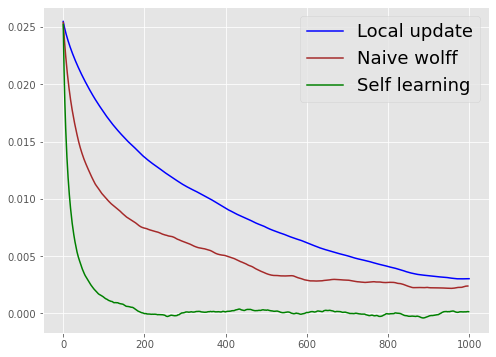

In [12]:
fig = plt.figure(figsize=(8,6))
plt.plot(C_40[:1000], label="Local update", color='blue')
plt.plot(C_40_wolff[3:1000], label="Naive wolff", color='brown')
plt.plot(C_40_slmc[1:1000], label="Self learning", color='green')
plt.legend(fontsize=18)
#plt.xlabel('t [MCS]', fontsize=18)
#plt.ylabel('correlation', fontsize=18)
#plt.suptitle('Correlation_length(T:2.49, L:40)', fontsize=20)
fig.show()

## Local update

In [8]:
tau_10 = get_autcorrelation_time(C_10, 0,50)
tau_20 = get_autcorrelation_time(C_20, 0, 225)
tau_40 = get_autcorrelation_time(C_40, 0, 750)
tau_60 = get_autcorrelation_time(C_60, 0,2500)
tau_80 = get_autcorrelation_time(C_80, 0,2600)

In [9]:
print(f"autcorrelation_time L10:{tau_10}")
print(f"autcorrelation_time L20:{tau_20}")
print(f"autcorrelation_time L40:{tau_40}")
print(f"autcorrelation_time L60:{tau_60}")
print(f"autcorrelation_time L80:{tau_80}")

autcorrelation_time L10:[17.98]
autcorrelation_time L20:[74.11]
autcorrelation_time L40:[409.7]
autcorrelation_time L60:[996.87]
autcorrelation_time L80:[1873.16]


In [14]:
tau_list = [17, 74, 409, 996, 1873]
L_list = [10, 20, 40, 60, 80]

In [11]:
def func2(x, a, b):
    return b*(x**a)

x_data= np.array(L_list)
y_data = np.array(tau_list)
popt, pcov = curve_fit(func2, x_data, y_data)
print(popt)

[2.20821907 0.11761498]


/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_1732/2317368304.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


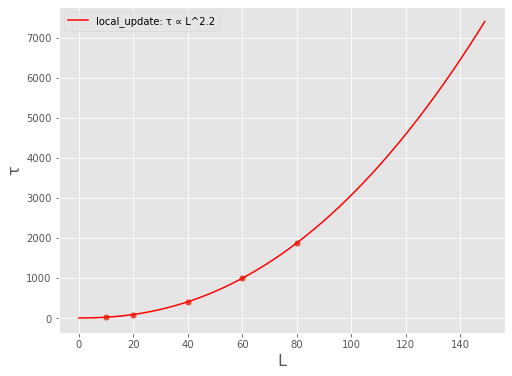

In [12]:
x = np.arange(150)
y  = popt[1]*(x**popt[0])

fig = plt.figure(figsize=(8, 6))
plt.plot(L_list, tau_list, '.',markersize=10)
plt.plot(y, color='red', label='local_update: τ ∝ L^2.2' )
plt.xlabel('L', fontsize=16)
plt.ylabel('τ', fontsize=16)
plt.legend()
fig.show()

## Naive wolff

No handles with labels found to put in legend.
/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_1732/2338898349.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


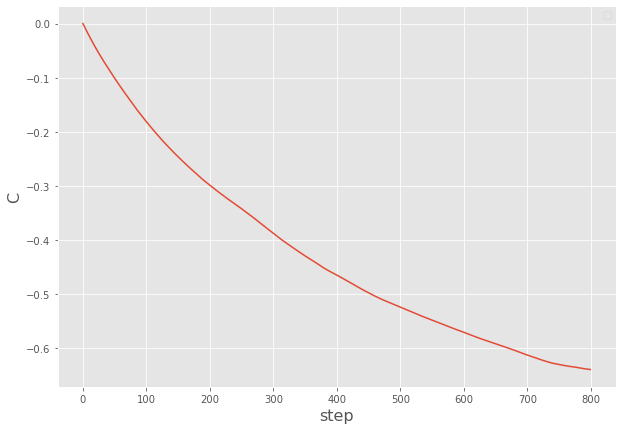

In [13]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.log(C_80_wolff[:800]/C_80_wolff[0]))
plt.xlabel('step', fontsize=16)
plt.ylabel('C', fontsize=16)
plt.legend()
fig.show()

In [14]:
tau_10_wolff = get_autcorrelation_time(C_80_wolff, 100, 500)
print(f"autcorrelation_time L10:{tau_10_wolff}")

autcorrelation_time L10:[829.13]


In [15]:
tau_10_wolff = get_autcorrelation_time(C_10_wolff, 0, 20)
tau_20_wolff = get_autcorrelation_time(C_20_wolff, 25, 120)
tau_40_wolff = get_autcorrelation_time(C_40_wolff, 100, 350)
tau_60_wolff = get_autcorrelation_time(C_60_wolff, 100, 500)
tau_80_wolff = get_autcorrelation_time(C_80_wolff, 100, 500)

In [16]:
print(f"autcorrelation_time L10:{tau_10_wolff}")
print(f"autcorrelation_time L20:{tau_20_wolff}")
print(f"autcorrelation_time L40:{tau_40_wolff}")
print(f"autcorrelation_time L60:{tau_60_wolff}")
print(f"autcorrelation_time L80:{tau_80_wolff}")

autcorrelation_time L10:[5.34]
autcorrelation_time L20:[32.07]
autcorrelation_time L40:[181.82]
autcorrelation_time L60:[407.55]
autcorrelation_time L80:[829.13]


In [15]:
tau_list_wolff = [5.34, 32.07, 181.82, 407.55, 829]
L_list = [10, 20, 40, 60, 80]
x_data= np.array(L_list)
y_data_wolff = np.array(tau_list_wolff)
popt_wolff, pcov_wolff = curve_fit(func2, x_data, y_data_wolff)
print(popt)

NameError: name 'func2' is not defined

In [16]:
tau_list_wolff = [5.34, 32.07, 181.82, 407.55, 829]
L_list = [10, 20, 40, 60, 80]

## Self learning

In [18]:
tau_10_slmc = get_autcorrelation_time(C_10_slmc, 0, 12)
print(f"autcorrelation_time L10:{tau_10_slmc}")
tau_20_slmc = get_autcorrelation_time(C_20_slmc, 0,25)
print(f"autcorrelation_time L20:{tau_20_slmc}")
tau_40_slmc = get_autcorrelation_time(C_40_slmc, 0,100)
print(f"autcorrelation_time L40:{tau_40_slmc}")
tau_60_slmc = get_autcorrelation_time(C_60_slmc, 0,140)
print(f"autcorrelation_time L60:{tau_60_slmc}")
tau_80_slmc = get_autcorrelation_time(C_80_slmc, 0, 300)
print(f"autcorrelation_time L80:{tau_80_slmc}")

autcorrelation_time L10:[3.01]
autcorrelation_time L20:[6.2]
autcorrelation_time L40:[28.69]
autcorrelation_time L60:[71.09]
autcorrelation_time L80:[210.52]


In [17]:
tau_list_slmc = [3.02, 6.2, 28.69, 71.09, 166.7]
y_data_slmc = np.array(tau_list_slmc)

In [19]:
tau_list_slmc = [3.02, 6.2, 28.69, 71.09, 166.7]
y_data_slmc = np.array(tau_list_slmc)
popt_slmc, pcov_slmc = curve_fit(func2, x_data, y_data_slmc)
print(popt_slmc)

[2.75073488e+00 9.64069047e-04]


In [19]:
x = np.arange(150)
y  = popt[1]*(x**popt[0])
y_wolff  = popt_wolff[1]*(x**popt_wolff[0])
y_slmc = popt_slmc[1]*(x**popt_slmc[0])

fig = plt.figure(figsize=(8, 8))
plt.plot(L_list, tau_list, '.',markersize=10)
plt.plot(y, color='red', label='local_update: τ ∝ L^2.21' )
plt.plot(L_list, tau_list_wolff, '.',markersize=10, color='purple')
plt.plot(y_wolff, color='purple', label='Naive wolff :  τ ∝ L^2.39' )
plt.plot(L_list, tau_list_slmc, '.',markersize=10, color='green')
plt.plot(y_slmc,  color='green', label='Self learning: τ ∝ L^2.75' )

#plt.xlabel('L', fontsize=16)
#plt.ylabel('τ', fontsize=16)
plt.legend()
fig.show()

NameError: name 'popt' is not defined

### def func_c1(x, a, b):
    return a*x + b

No handles with labels found to put in legend.
/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_1232/1470186095.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


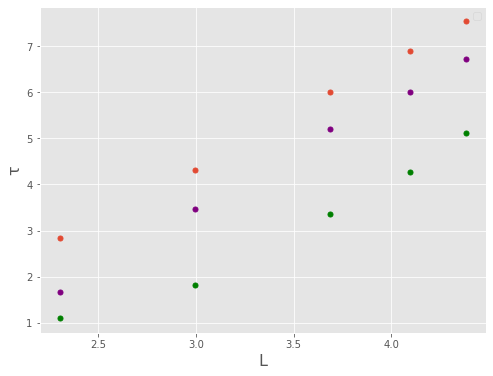

In [27]:
"""
x = np.arange(150)
y  = popt[1]*(x**popt[0])
y_wolff  = popt_wolff[1]*(x**popt_wolff[0])
y_slmc = popt_slmc[1]*(x**popt_slmc[0])
"""

fig = plt.figure(figsize=(8, 6))
plt.plot( np.log(L_list), np.log(tau_list), '.',markersize=10)
#plt.plot(y, color='red', label='local_update: τ ∝ L^2.2' )
plt.plot(np.log(L_list), np.log(tau_list_wolff), '.',markersize=10, color='purple')
#plt.plot(y_wolff, color='purple', label='Naive wolff' )
plt.plot(np.log(L_list), np.log(tau_list_slmc), '.',markersize=10, color='green')
#plt.plot(y_slmc,  color='green', label='Self learning' )

plt.xlabel('L', fontsize=16)
plt.ylabel('τ', fontsize=16)
plt.legend()
fig.show()

In [36]:
x_data = np.log(L_list)
y_data = np.log(tau_list)
popt, pcov = curve_fit(func_c1, x_data, y_data)
print(popt)

[ 2.28516808 -2.46343013]


In [30]:
y_data

array([2.83321334, 4.30406509, 6.01371516, 6.90374726, 7.5352967 ])

In [38]:
x_data = np.log(L_list)
y_data = np.log(tau_list_wolff)
popt, pcov = curve_fit(func_c1, x_data, y_data)
print(popt)

[ 2.41555068 -3.82151718]


In [34]:
x_data = np.log(L_list)
y_data = np.log(tau_list_wolff)
popt, pcov = curve_fit(linear_func, x_data, y_data)
print(popt)

[ 2.41555068 -3.82151718]


In [6]:
import os

In [8]:
for seed in [2022, 2023, 2024, 2025,2026]:
    os.makedirs(f'/Users/oritoyusuke/Desktop/graduate-research/output/L70/seed{seed}_SLMC/')

## アルゴリズムごとの比較

## Middle size

In [2]:
L_list = [10, 20, 40, 60, 80]
tau_list = [17, 74, 409, 996, 1873]
tau_list_wolff = [5.34, 32.07, 181.82, 407.55, 829]
tau_list_slmc = [3.02, 6.2, 28.69, 71.09, 166.7]
popt_local = [2.20821907 ,0.11761498]
popt_wolff=[2.32095981 ,0.03156292]
popt_slmc = [2.75073488e+00 , 9.64069047e-04]

In [3]:
x = np.arange(100)
y  = popt_local[1]*(x**popt_local[0])
#y_wolff  = popt_wolff[1]*(x**popt_wolff[0])
y_slmc = popt_slmc[1]*(x**popt_slmc[0])

fig = plt.figure(figsize=(10, 8))
plt.plot(L_list, tau_list, '.',markersize=15,label='Local_update: τ ∝ L^2.21')
plt.plot(y, color='red')
plt.plot(L_list, tau_list_wolff, '.',markersize=15, color='purple', label='Naive wolff')
#plt.plot(y_wolff, color='purple', label='Naive wolff :  τ ∝ L^2.39' )
plt.plot(L_list, tau_list_slmc, '.',markersize=15, color='green', label='SLMC: τ ∝ e ^L/L0')
plt.plot(y_slmc,  color='green' )

#plt.xlabel('L', fontsize=16)
#plt.ylabel('τ', fontsize=16)
plt.legend(fontsize=18)
fig.show()

NameError: name 'np' is not defined